   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


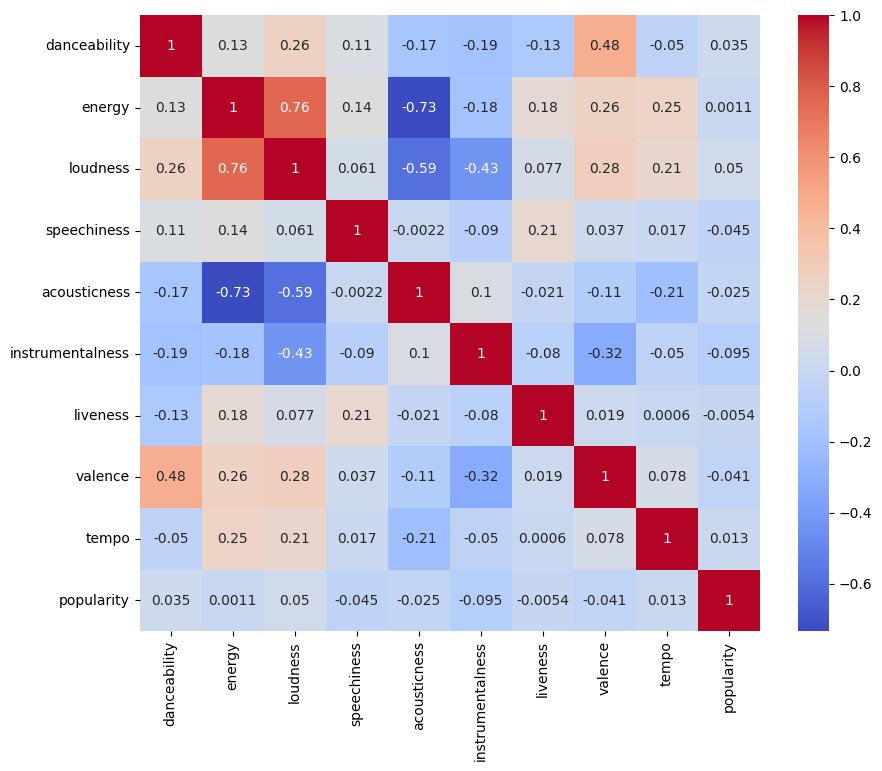

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('dataset.csv')

# Inspect the data
print(df.head())
print(df.info())

# Select relevant columns
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features]
y = df['popularity']

# Preprocessing: handle missing data, scale features
X = X.fillna(X.mean())  # Fill missing values if any
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check correlations (optional)
plt.figure(figsize=(10,8))
sns.heatmap(df[features + ['popularity']].corr(), annot=True, cmap='coolwarm')
plt.show()


In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the size of the split
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (91200, 9), Testing set: (22800, 9)


In [38]:
# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 483.4018945631223
R² Score: 0.02042427783564782


In [39]:
# Print coefficients for each feature
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)


                  Coefficient
danceability         1.595571
energy              -0.769051
loudness             0.578594
speechiness         -1.293010
acousticness        -0.466289
instrumentalness    -2.569046
liveness             0.261974
valence             -2.539730
tempo                0.436737


In [40]:
# Optional: clustering based on genre
df['track_genre'] = df['track_genre'].astype('category').cat.codes  # Convert genres to numerical values
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose appropriate number of clusters
df['genre_cluster'] = kmeans.fit_predict(df[['track_genre']])

# Perform regression for each cluster
for cluster in sorted(df['genre_cluster'].unique()):
    print(f"\nCluster {cluster}:")
    X_cluster = df[df['genre_cluster'] == cluster][features]
    y_cluster = df[df['genre_cluster'] == cluster]['popularity']
    
    X_cluster_scaled = scaler.fit_transform(X_cluster)
    X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X_cluster_scaled, y_cluster, test_size=0.2, random_state=42)
    
    model_cluster = LinearRegression()
    model_cluster.fit(X_train_cluster, y_train_cluster)
    
    y_pred_cluster = model_cluster.predict(X_test_cluster)
    
    mse_cluster = mean_squared_error(y_test_cluster, y_pred_cluster)
    r2_cluster = r2_score(y_test_cluster, y_pred_cluster)
    
    print(f'MSE: {mse_cluster}, R²: {r2_cluster}')



Cluster 0:
MSE: 441.28680070728734, R²: 0.0754539016516137

Cluster 1:
MSE: 470.4420865015597, R²: 0.02386747765230346

Cluster 2:
MSE: 446.5815229467372, R²: 0.06266910498067446

Cluster 3:
MSE: 532.6890932552924, R²: 0.017714935694049472

Cluster 4:
MSE: 464.68500147191554, R²: 0.04155715737086729


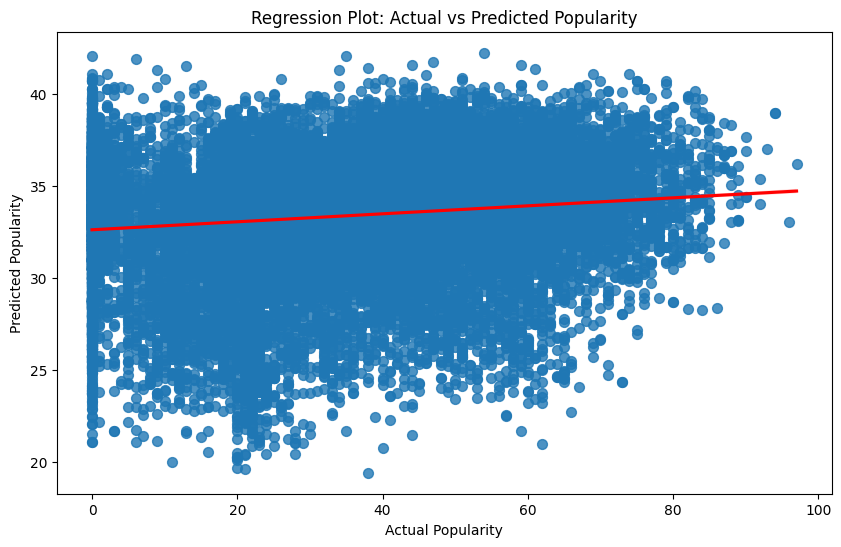

In [41]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the regression (Actual vs Predicted)
plt.figure(figsize=(10,6))
sns.regplot(x='Actual', y='Predicted', data=results, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Regression Plot: Actual vs Predicted Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.show()


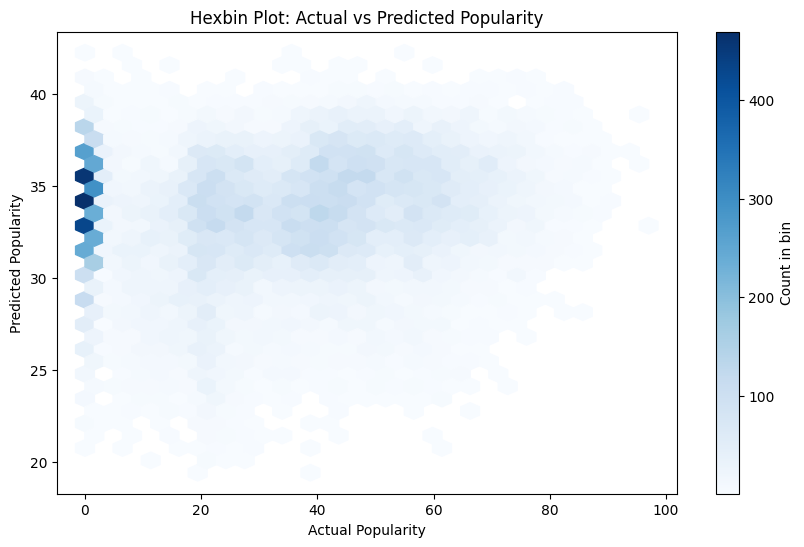

In [42]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a hexbin plot for Actual vs Predicted
plt.figure(figsize=(10,6))
plt.hexbin(y_test, y_pred, gridsize=30, cmap='Blues', mincnt=1)  # Adjust gridsize for resolution
plt.colorbar(label='Count in bin')  # Color bar to indicate the density of points
plt.title('Hexbin Plot: Actual vs Predicted Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.show()


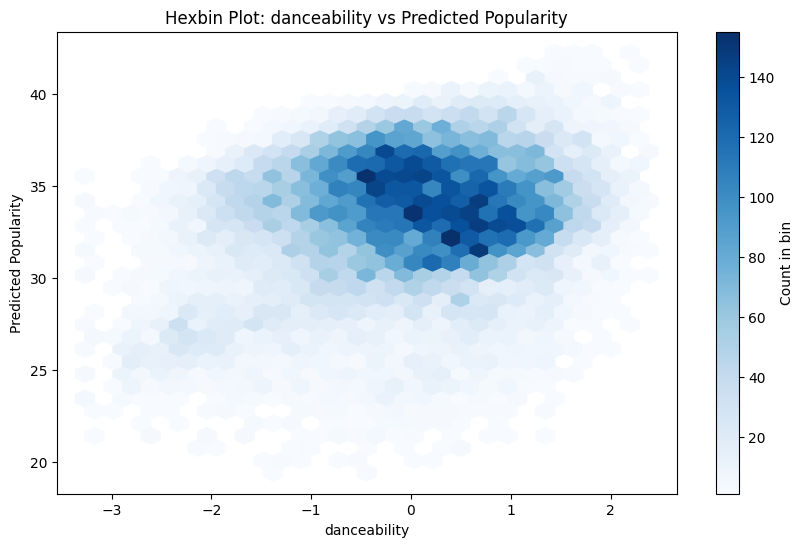

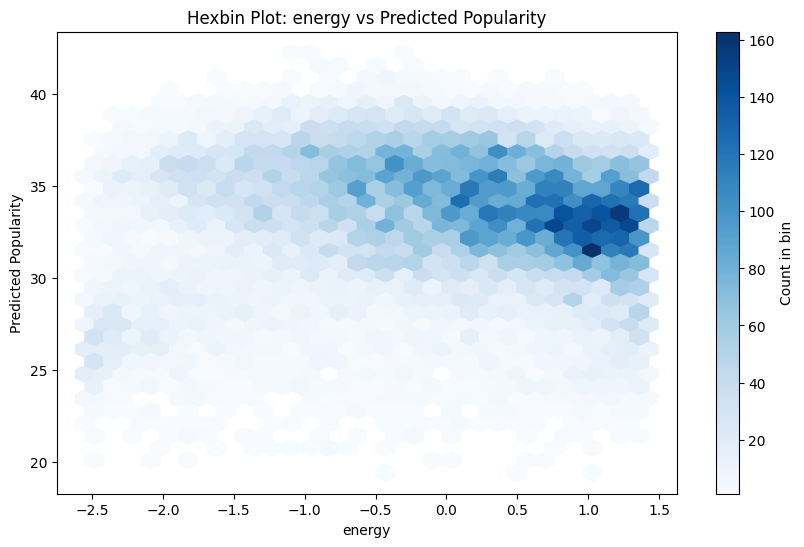

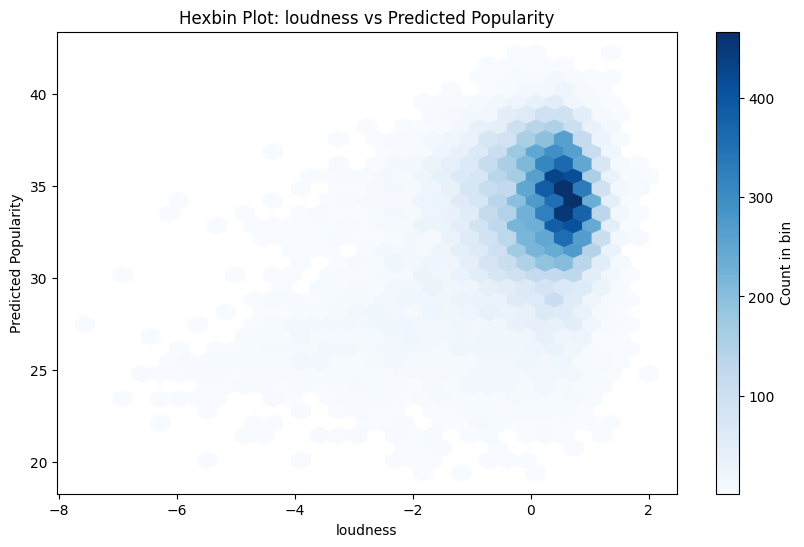

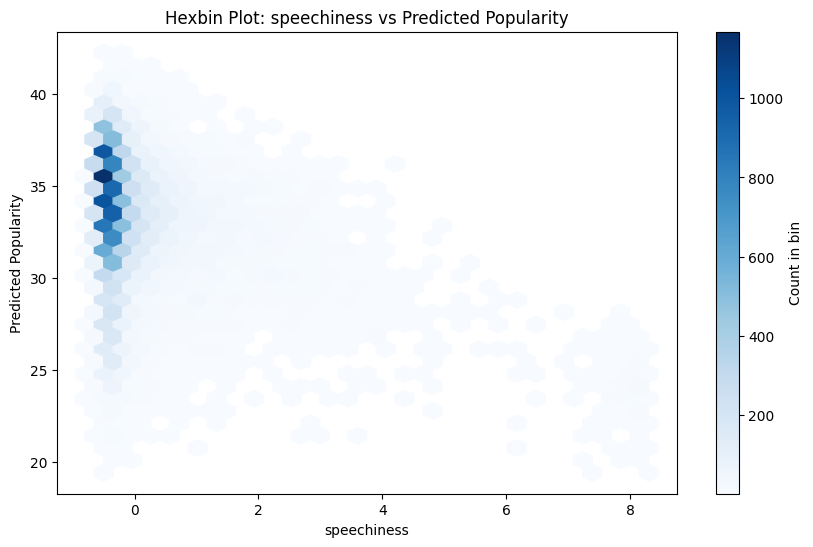

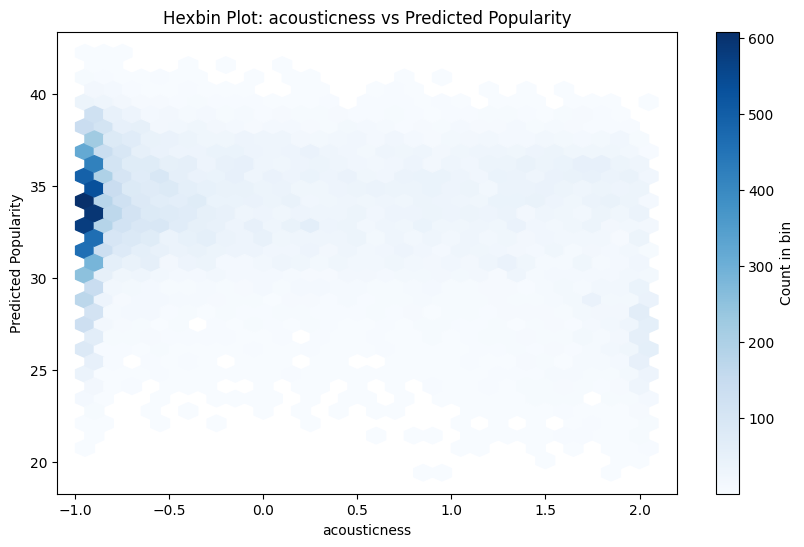

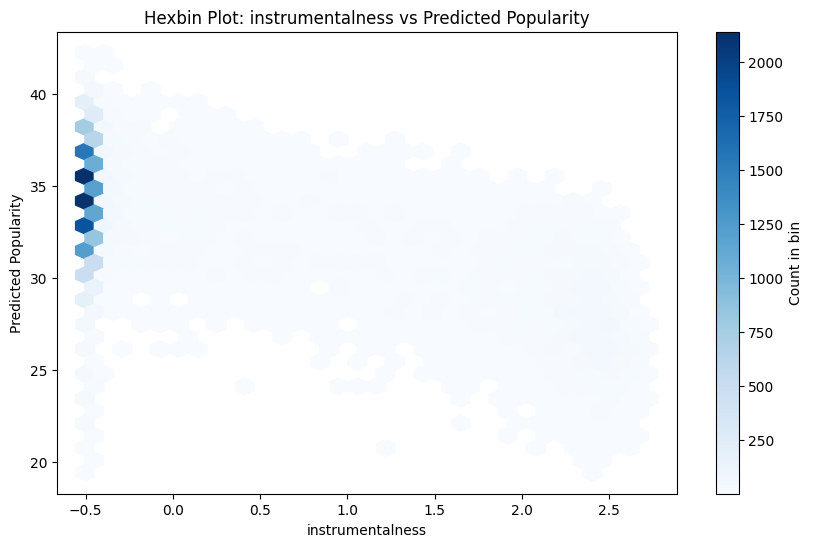

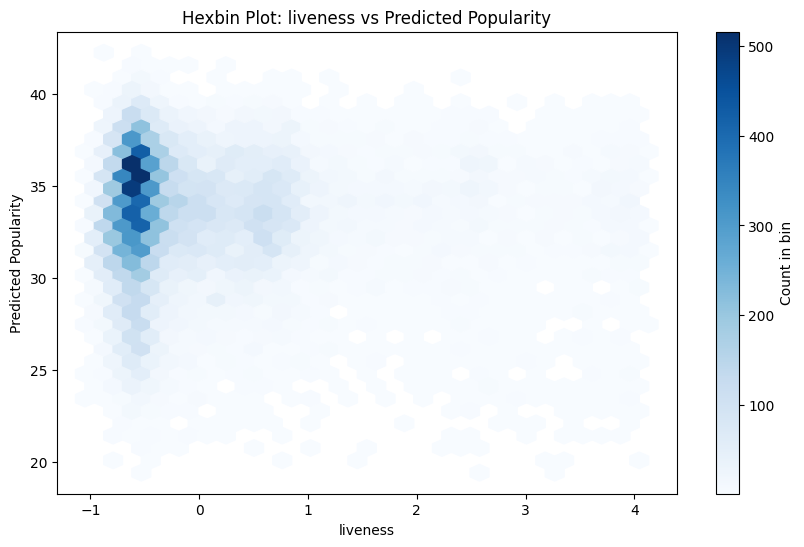

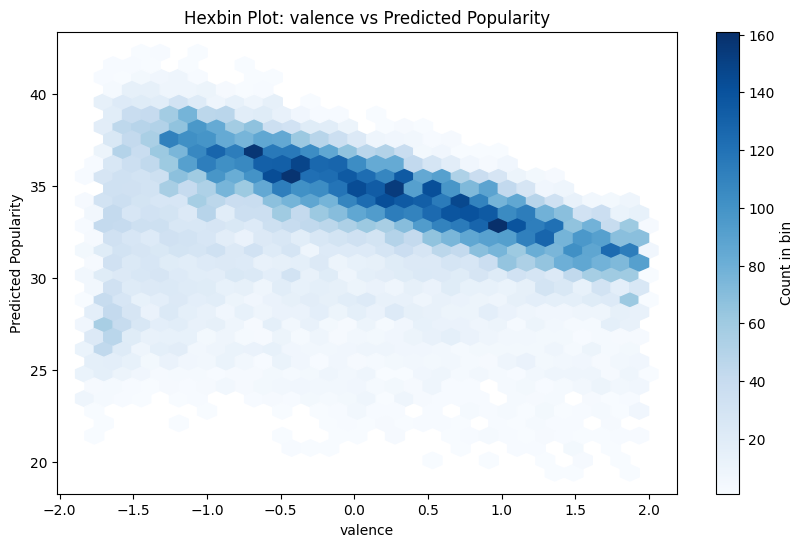

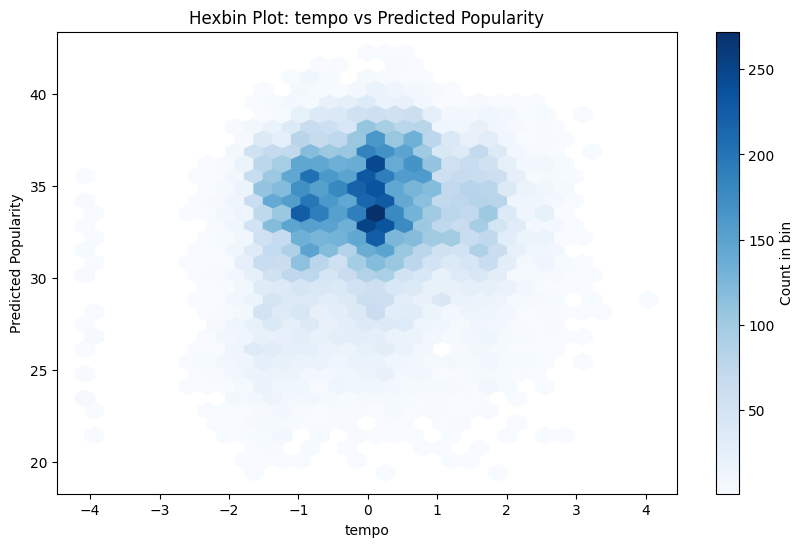

In [43]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# List of features
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Prepare the dataset
X = df[features]
y = df['popularity']

# Preprocessing: handle missing data and scale features
X = X.fillna(X.mean())  # Handle missing values if any
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict popularity
y_pred = model.predict(X_test)

# Create hexbin plots for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.hexbin(X_test[:, features.index(feature)], y_pred, gridsize=30, cmap='Blues', mincnt=1)
    plt.colorbar(label='Count in bin')  # Color bar to show density
    plt.title(f'Hexbin Plot: {feature} vs Predicted Popularity')
    plt.xlabel(f'{feature}')
    plt.ylabel('Predicted Popularity')
    plt.show()


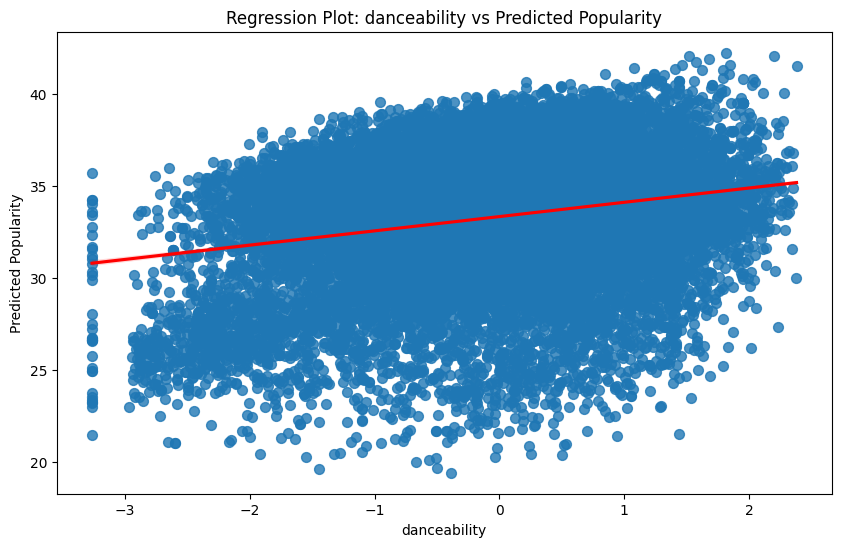

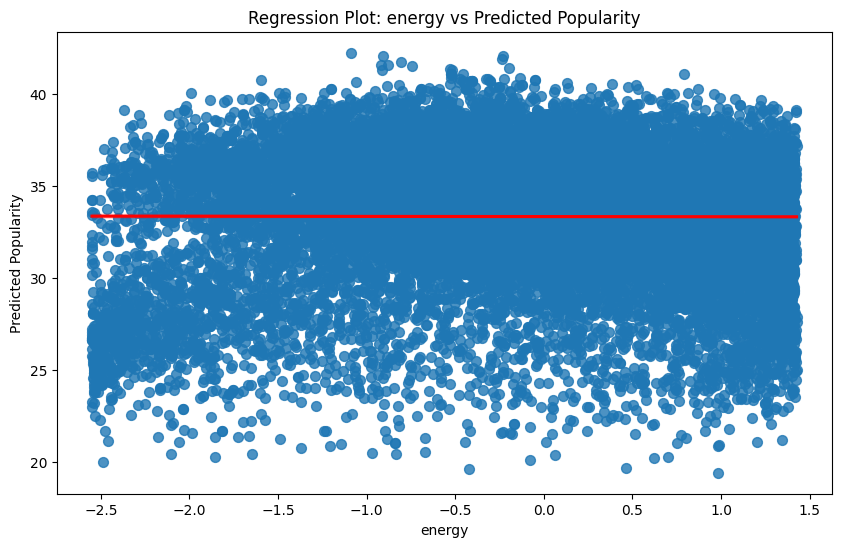

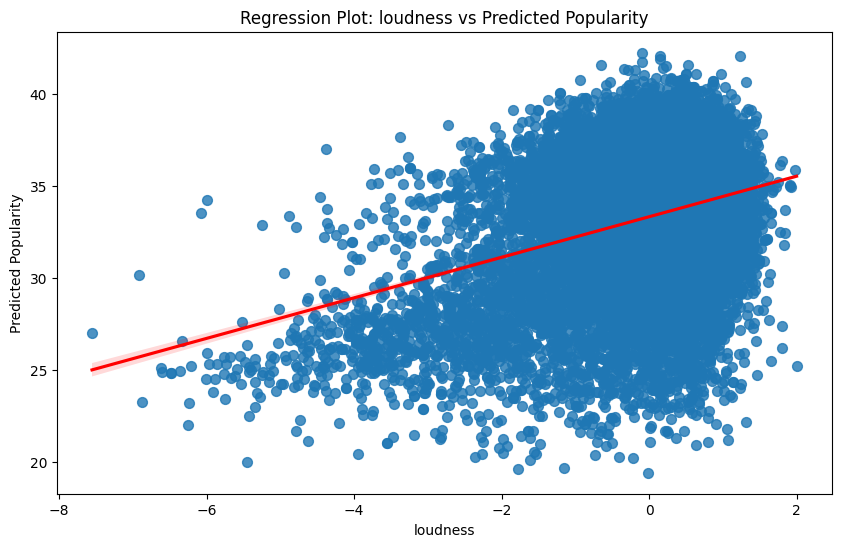

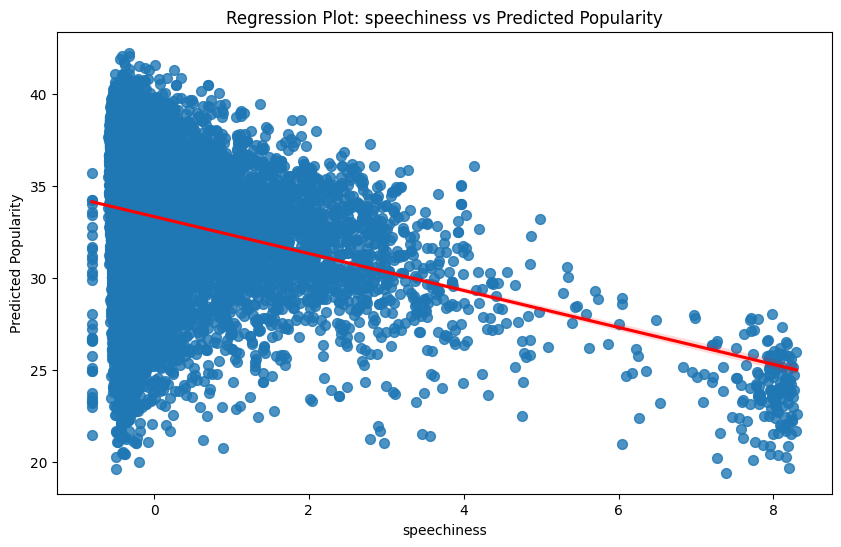

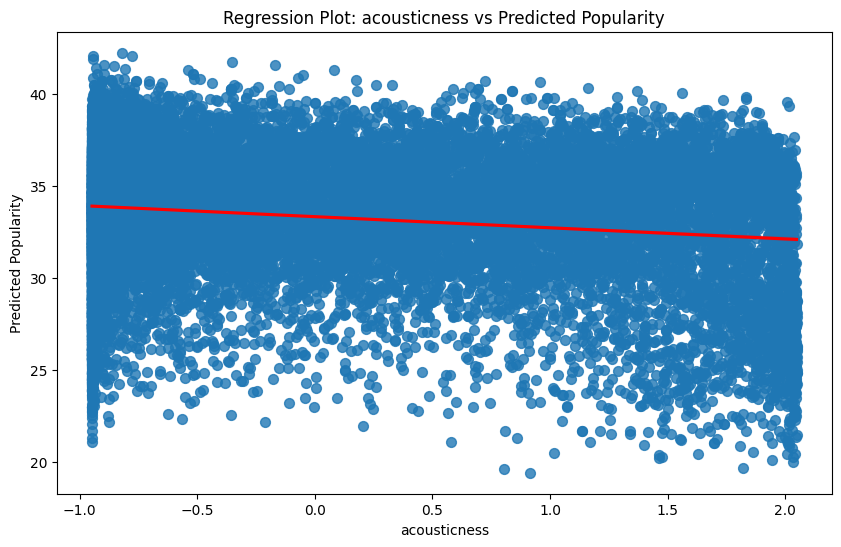

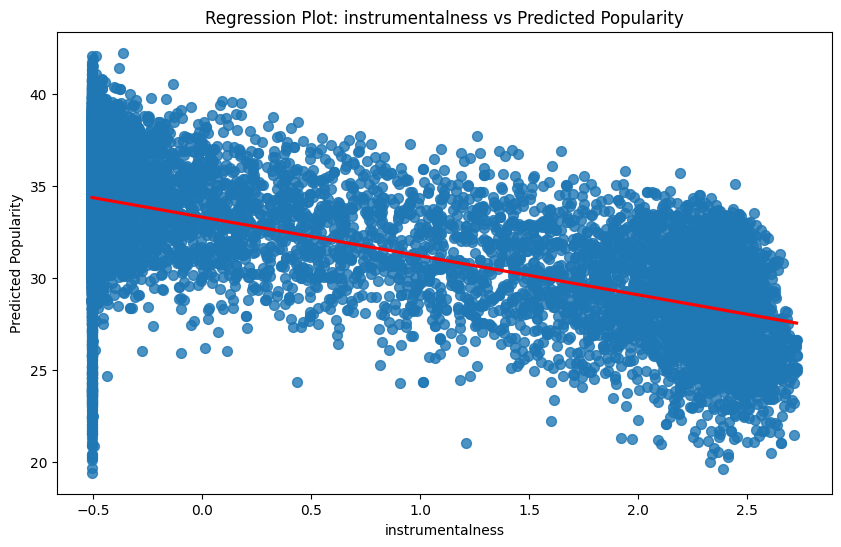

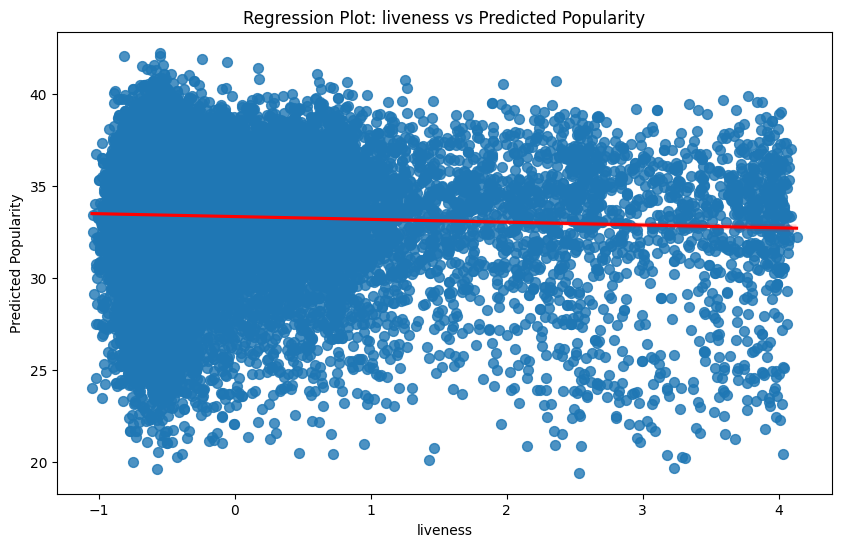

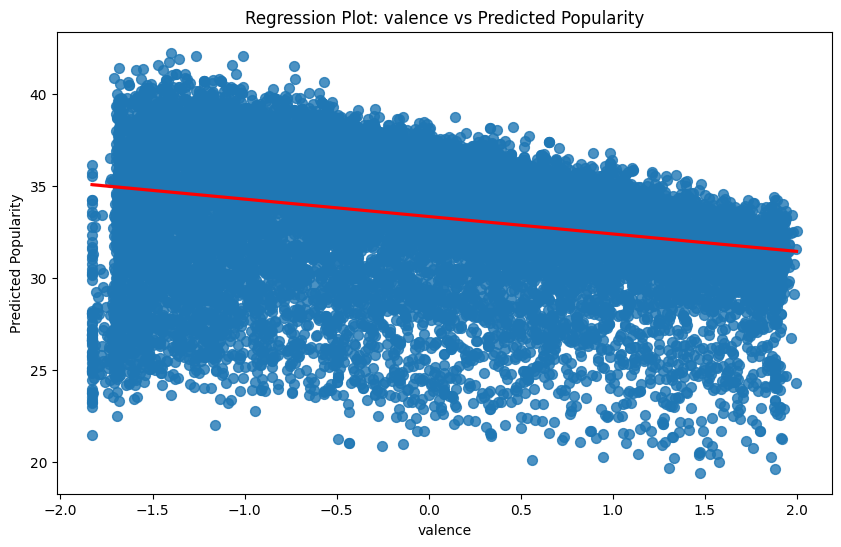

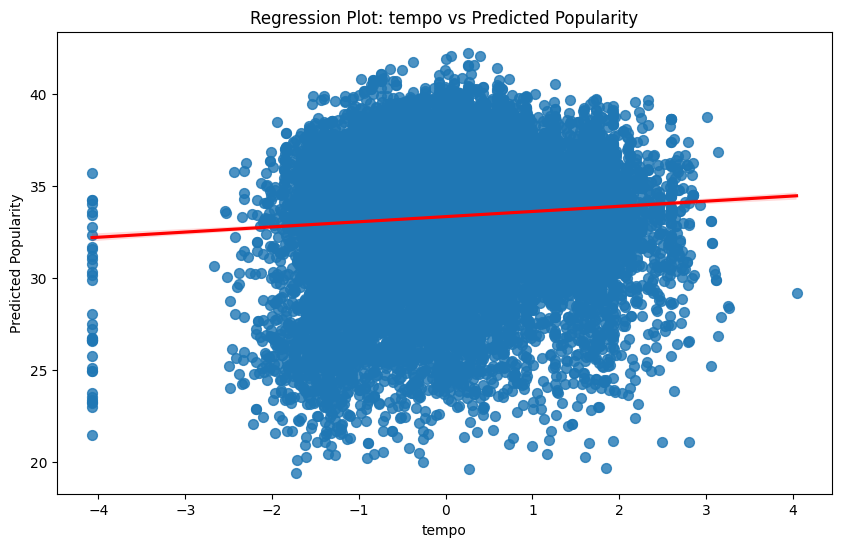

In [44]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# List of features
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Prepare the dataset
X = df[features]
y = df['popularity']

# Preprocessing: handle missing data and scale features
X = X.fillna(X.mean())  # Handle missing values if any
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict popularity
y_pred = model.predict(X_test)

# Create regression plots for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=X_test[:, features.index(feature)], y=y_pred, scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(f'Regression Plot: {feature} vs Predicted Popularity')
    plt.xlabel(f'{feature}')
    plt.ylabel('Predicted Popularity')
    plt.show()
